In [122]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [123]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [124]:
class NeuralNetwork:
   def __init__(self, input_shape, num_classes):
       self.model = self.build_model(input_shape, num_classes)
   def build_model(self, input_shape, num_classes):
       model = models.Sequential()
       model.add(layers.Flatten(input_shape=input_shape))
       model.add(layers.Dense(128, activation='relu'))
       model.add(layers.Dense(64, activation='relu'))
       model.add(layers.Dense(num_classes, activation='softmax'))
       model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
       return model
 
   def train(self, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1):
       history = self.model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
       return history
   def evaluate(self, test_images, test_labels):
       return self.model.evaluate(test_images, test_labels)
   def predict(self, images):
       return self.model.predict(images)

In [125]:
input_shape = (28, 28, 1)
num_classes = 10
nn = NeuralNetwork(input_shape, num_classes)
history = nn.train(train_images, train_labels, epochs=5)

Epoch 1/5
844/844 [==============================] - 3s 3ms/step - loss: 0.2935 - accuracy: 0.9146 - val_loss: 0.1201 - val_accuracy: 0.9650
Epoch 2/5
844/844 [==============================] - 2s 2ms/step - loss: 0.1197 - accuracy: 0.9646 - val_loss: 0.0948 - val_accuracy: 0.9713
Epoch 3/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0771 - val_accuracy: 0.9777


In [126]:
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


In [129]:
n=20
predictions2 = [test_images[n:n+5],nn.predict(test_images[n:n+5])]

1/1 [==============================] - 0s 27ms/step


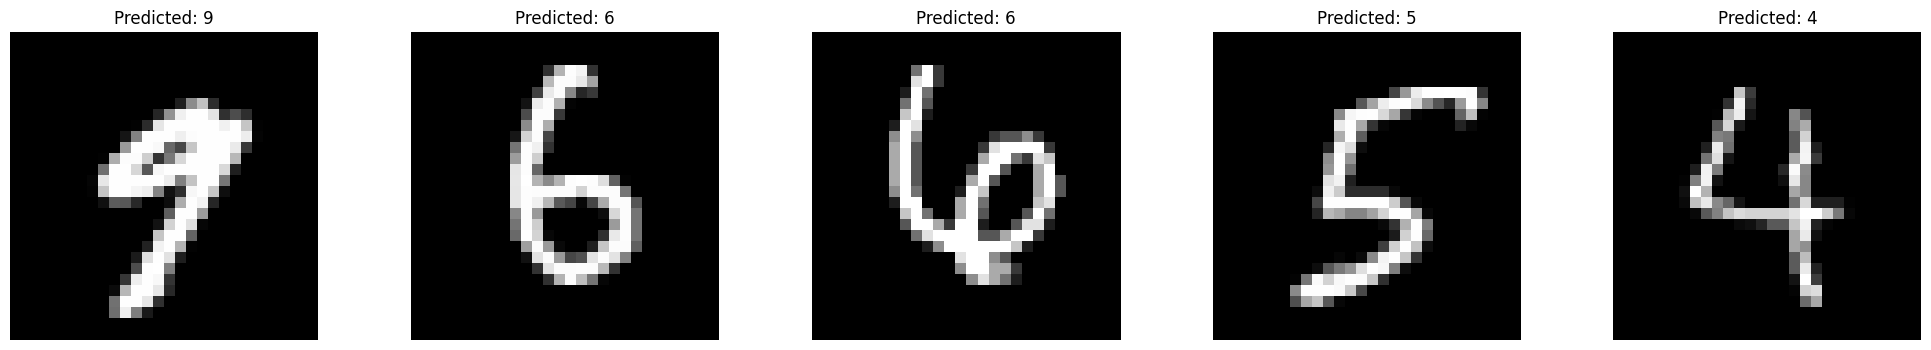

In [130]:
plt.figure(figsize=(25, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img_data = predictions2[0][i].reshape(28, 28)
    plt.imshow(img_data, cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions2[1][i])}')
    plt.axis('off')
plt.show()